# Week 3: Bayesian Optimization
#### Done by: Nigel Wee
Let's practise the Bayesian Optimization workflow with the **Concrete** dataset.<br>
This is an open source dataset from the UCI Machine Learning Repository.

https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength


---

## Problem 1: Data Import and Preprocessing

### 1(a) 

First, import the Concrete dataset.<br>
The input variables are the first 8 columns.<br>
The output is the last column (compressive strength.<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
df = pd.read_excel('Concrete_Data.xls')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


### 1(b)

Define the inputs X (first 8 columns) and output Y (last column).



In [3]:
X = df.iloc[:,:8]
y = df.iloc[:,8:]

### 1(c)

Transform X with `StandardScaler`.




In [4]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform your X data using the scaler
X_scaled = scaler.fit_transform(X)


### 1(d)

Use `train_test_split` to generate train and test sets.

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets with an 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (824, 8)
X_test shape: (206, 8)
y_train shape: (824, 1)
y_test shape: (206, 1)


### Plotting Utility Functions

You may define your own plotting function, or use the one provided here.

SkLearn `metrics` is used to calculate the Mean Squared Error and R2 Scores.

In [6]:
from sklearn import metrics

# Plot prediction vs true values for training and test sets
def plot(regressor_name, y_train, y_hat_train, y_test, y_hat_test):

    plt.rc('xtick',labelsize=14)
    plt.rc('ytick',labelsize=14)
    
    plt.figure(figsize = (14,6))
    
    # first subplot - training set
    ax1 = plt.subplot(121)
    
    # plot predicted values vs actual values
    plt.scatter(y_train,y_hat_train)
    
    # add a dash line indicating perfect predictions (Y=X)
    plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',lw=3)
    
    plt.xlabel('True Value',fontsize=16)
    plt.ylabel('Predicted Value',fontsize=16)
    
    # calculate mean squared error
    mse = metrics.mean_squared_error(y_train,y_hat_train)
    rmse = mse**0.5
    
    # calculate R2
    R2 = metrics.r2_score(y_train, y_hat_train)
    
    plt.title(regressor_name+' training set'+'\nRMSE: '+str(rmse)+'\nR2: '+str(R2),fontsize=16)


    # second subplot - test set
    ax2 = plt.subplot(122)
    
    # plot predicted values vs actual values
    plt.scatter(y_test,y_hat_test)
    
    # add a dash line indicating perfect predictions (Y=X)
    plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=3)
    
    plt.xlabel('True Value',fontsize=16)
    plt.ylabel('Predicted Value',fontsize=16)
    
    # calculate mean squared error
    mse = metrics.mean_squared_error(y_test,y_hat_test)  
    rmse = mse**0.5
    
    # calculate R2
    R2 = metrics.r2_score(y_test,y_hat_test)
    
    plt.title(regressor_name+' test set'+'\nRMSE: '+str(rmse)+'\nR2: '+str(R2),fontsize=16)

    
    plt.show()

    # return rmse and R2 - we can track the errors across different algorithms
    return rmse, R2



## Problem 2: Gaussian Process Regressor

### 2(a) 

Train the SkOpt `GaussianProcessRegressor` on the concrete dataset.<br>
Use the default parameters that come with the package.<br>
Display the regression results using your plot function.

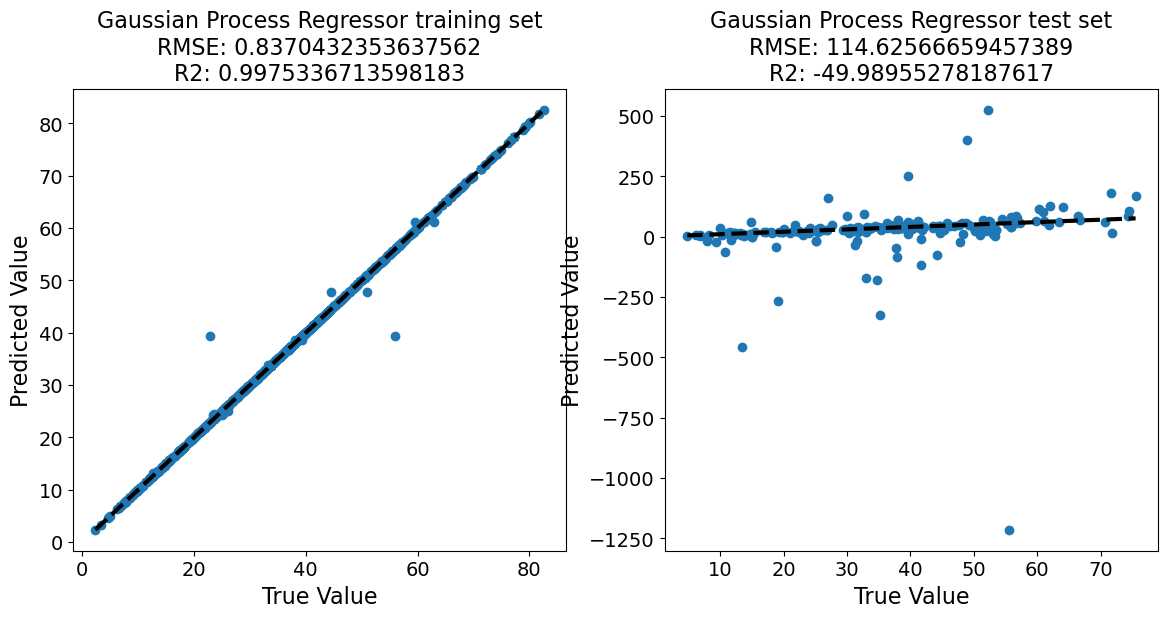

(114.62566659457389, -49.98955278187617)

In [7]:
from sklearn.gaussian_process import GaussianProcessRegressor

# Define the Gaussian Process Regressor
gpr = GaussianProcessRegressor()

# Perform training on the training set
gpr.fit(X_train, y_train)

# Predict on both training and test sets
y_hat_train = gpr.predict(X_train)
y_hat_test = gpr.predict(X_test)

# Plot the results using the provided plotting function
plot("Gaussian Process Regressor", y_train, y_hat_train, y_test, y_hat_test)


### 2(b) 

Now, try tuning the hyperparameters. Can you do better than the default?

These are some of the parameters tunable for the Kernel:

> `Matern` kernel, popular kernel choice that allows control of function smoothness<br>
> `Constant` kernel, controls the magnitude of the Matern kernel<br>
> $\nu$ (nu), parameter to control smoothness of Matern kernel<br>
> Length scale bounds, allow the kernel length scales to be modified<br>

Parameters tunable for the Regressor:

> $\alpha$ (alpha), measure of the white noise of the dataset<br>
> n_restart_optimizer: number of optimizer restarts for finding best parameters<br>

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


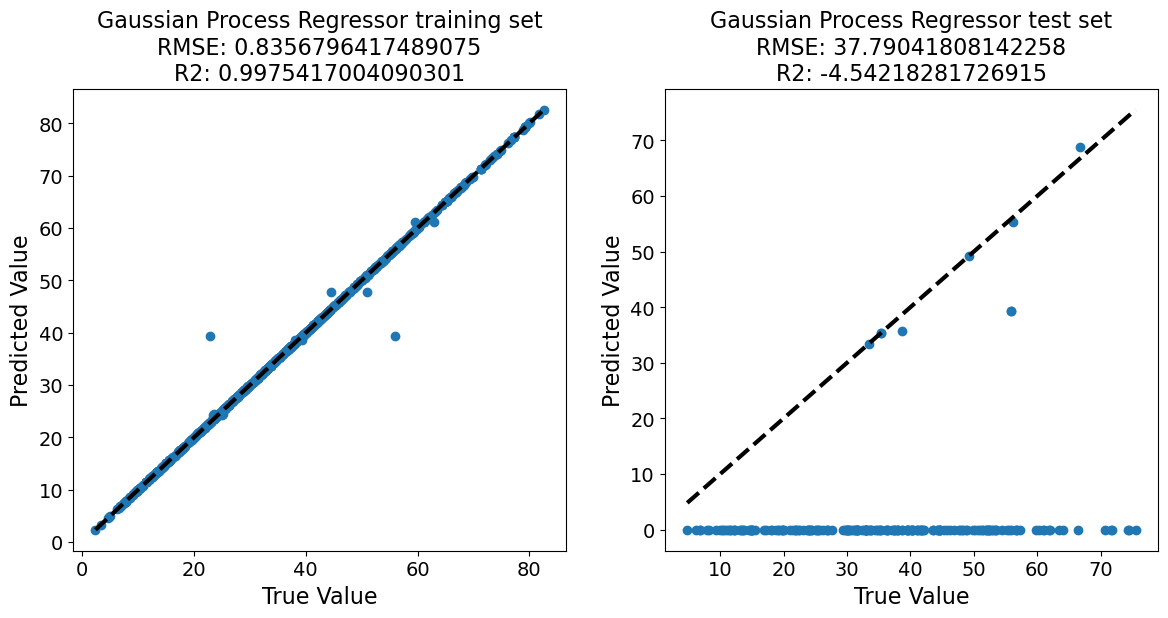

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


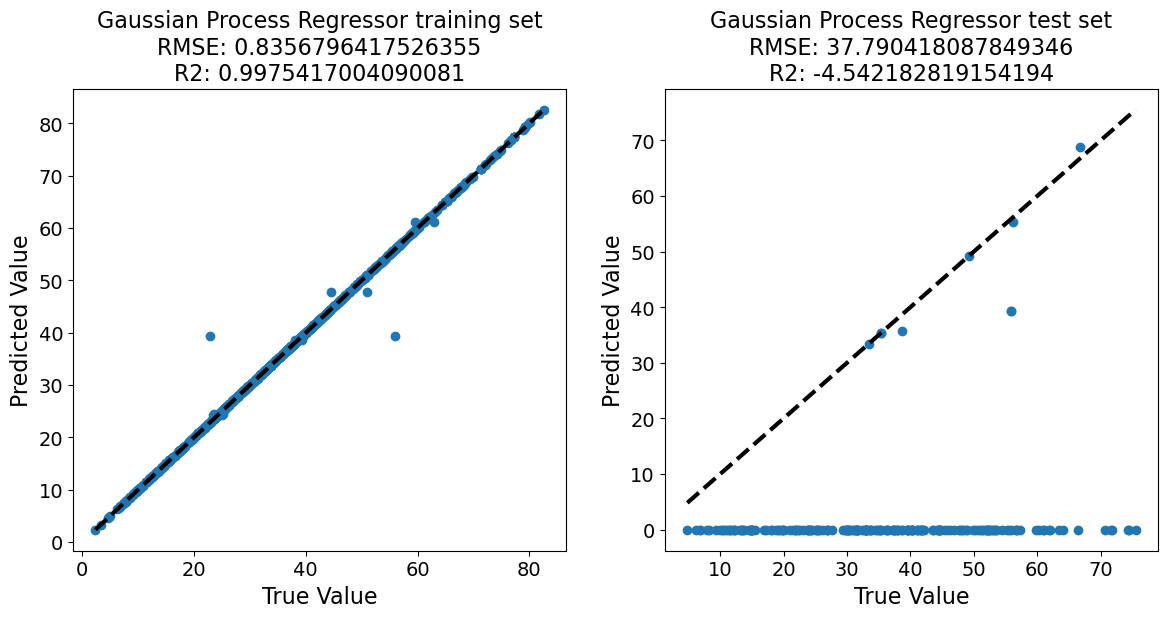

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


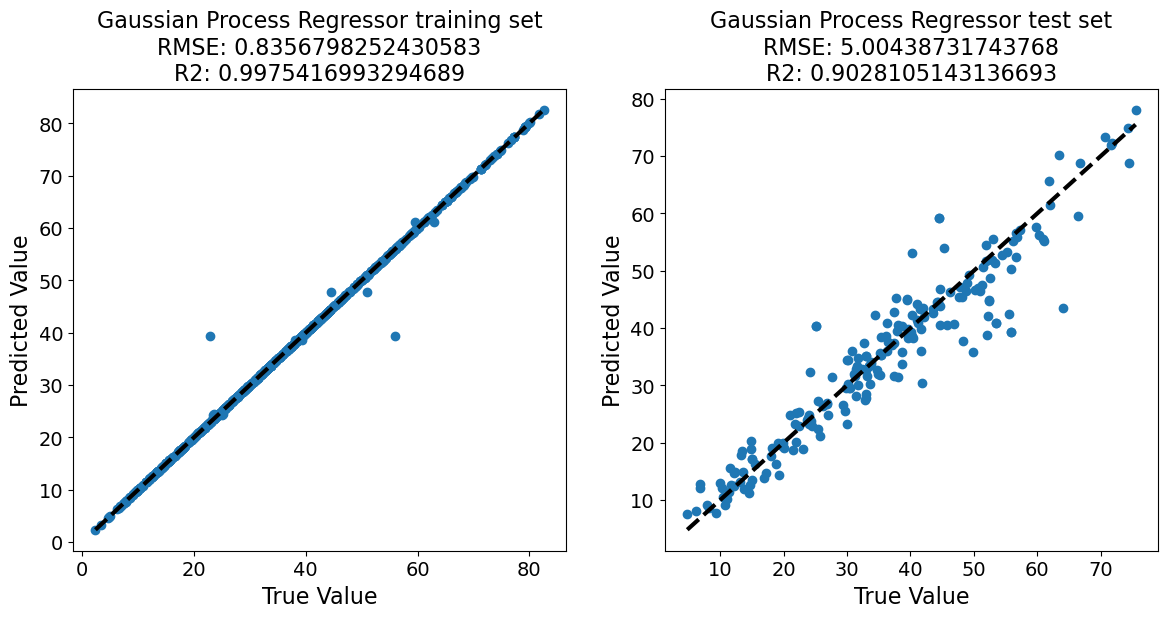

In [8]:
from sklearn.gaussian_process.kernels import Matern, ConstantKernel

# Define different sets of hyperparameters
param_sets = [
    {
        'kernel': ConstantKernel(1.0) * Matern(length_scale=1.0, nu=1.5),
        'alpha': 1e-5,
        'n_restarts_optimizer': 0
    },
    {
        'kernel': ConstantKernel(2.0) * Matern(length_scale=0.5, nu=2.5),
        'alpha': 1e-4,
        'n_restarts_optimizer': 5
    },
    {
        'kernel': ConstantKernel(0.5) * Matern(length_scale=2.0, nu=0.5),
        'alpha': 1e-3,
        'n_restarts_optimizer': 10
    }
]


# Initialize an empty list to store the trained models
trained_models = []

# Loop over each parameter set and train the model
for param_set in param_sets:
    # Initialize the Gaussian Process Regressor with the current parameter set
    gpr = GaussianProcessRegressor(**param_set)
    
    # Perform training on the training set
    gpr.fit(X_train, y_train)
    
    # Predict on both training and test sets
    y_hat_train = gpr.predict(X_train)
    y_hat_test = gpr.predict(X_test)
    
    # Plot the results using the provided plotting function
    rmse, R2 = plot("Gaussian Process Regressor", y_train, y_hat_train, y_test, y_hat_test)
    
    # Store the trained model along with its hyperparameters and performance metrics
    trained_models.append({'model': gpr, 'hyperparameters': param_set, 'RMSE': rmse, 'R2': R2})


## Problem 3: Bayesian Optimization

### 3(a)

Set the proper bounds based on the min and max of the dataset.

In [9]:
# Calculate the minimum and maximum for each column in X
min_values = X.min()
max_values = X.max()

# Create an array of tuples [(min, max) ...] for each column in X
bounds = [(min_values[col], max_values[col]) for col in X.columns]

# Print the bounds for each column
print("Bounds for each column in X:")
for col, bound in zip(X.columns, bounds):
    print(f"{col}: {bound}")


Bounds for each column in X:
Cement (component 1)(kg in a m^3 mixture): (102.0, 540.0)
Blast Furnace Slag (component 2)(kg in a m^3 mixture): (0.0, 359.4)
Fly Ash (component 3)(kg in a m^3 mixture): (0.0, 200.1)
Water  (component 4)(kg in a m^3 mixture): (121.75, 247.0)
Superplasticizer (component 5)(kg in a m^3 mixture): (0.0, 32.2)
Coarse Aggregate  (component 6)(kg in a m^3 mixture): (801.0, 1145.0)
Fine Aggregate (component 7)(kg in a m^3 mixture): (594.0, 992.6)
Age (day): (1.0, 365.0)


### 3(b)

Create a new Skopt `Optimizer`.

In [10]:
from skopt import Optimizer
from skopt.space import Real

# Define the bounds for each hyperparameter
bounds = [
    Real(min_values[0], max_values[0], name='alpha'),  # assuming alpha is the first hyperparameter
    Real(min_values[1], max_values[1], name='length_scale'),  # assuming length_scale is the second hyperparameter
    # Add more Real objects for other hyperparameters if needed
]

# Create the optimizer using the defined bounds and 'EI' as the acquisition function
optimizer = Optimizer(
    dimensions=bounds,
    base_estimator='gp',
    acq_func='EI',
    random_state=42  # set random state for reproducibility
)


### 3(c)

`tell` the `Optimizer` the data from the **Concrete** dataset.

In [11]:
def evaluate_hyperparameters(alpha, length_scale):
    # Define the Gaussian Process Regressor with the given hyperparameters
    gpr = GaussianProcessRegressor(kernel=ConstantKernel(alpha) * Matern(length_scale=length_scale, nu=1.5))
    
    # Perform training on the training set
    gpr.fit(X_train, y_train)
    
    # Predict on the test set
    y_hat_test = gpr.predict(X_test)
    
    # Calculate the evaluation metric (e.g., RMSE or R2 score)
    rmse = metrics.mean_squared_error(y_test, y_hat_test, squared=False)
    
    # Return the evaluation metric (RMSE in this case)
    return rmse

# Loop over each iteration of the optimizer
for i in range(10):  # for example, run 10 iterations
    # Ask the optimizer for the next set of hyperparameters to evaluate
    next_params = optimizer.ask()
    
    # Evaluate the hyperparameters using the defined function
    rmse = evaluate_hyperparameters(*next_params)
    
    # Provide the optimizer with the results using the tell function
    optimizer.tell(next_params, rmse)


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs",

### 3(d)

`ask` the `Optimizer` for the next set of experimental parameter(s) to try.

In [12]:
# Ask the optimizer for the next set of parameters to evaluate
next_params = optimizer.ask()

# Print or use the suggested parameters
print("Next set of parameters to evaluate:")
print(next_params)


Next set of parameters to evaluate:
[430.2329701360871, 97.71667146778184]


### 3(e) 

We will use the built-in SkOpt function `gp_minimize`, to perform hyperparameter tuning.<br>
The purpose will be to tune and improve the SkLearn `GradientBoostingRegressor`.<br>
We will consider only two hyperparameters, `n_estimators` and `max_depth`.

First, define a function that accept two inputs, n_estimators and max_depth.<br>
The output of the function should be the R2 score of the trained regressor on the test set.

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

def gb_score(X):
    
    n_estimators = X[0]
    max_depth = X[1]
    
    # Create Gradient Boosting regressor with the desired parameters
    gbregressor = GradientBoostingRegressor(n_estimators = n_estimators, max_depth = max_depth)
    
    # Perform the training on the Concrete training set
    gbregressor.fit(X_train,y_train)
    
    # Predict using the trained regressor on the test set
    y_hat_test=gbregressor.predict(X_test)
    
    # Calculate the test set R2 score
    R2 = metrics.r2_score(y_test, y_hat_test)
    
    # Return the negative of the R2 score (since the algorithm minimizes by default)
    return -R2

In [14]:
# Check the function for some parameter values 
print(gb_score([100,3]))

-0.8820699199800247


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Next, implement the optimization with SkOpt `gp_minimize`

First, define the bounds as follows.

In [15]:
# Define the bounds for n_estimators and max_depth
bounds = [(5,200),(2,10)]
print(bounds)

[(5, 200), (2, 10)]


Specify `gb_score` as the function to be minimized with `gp_minimize`.<br>
Choose expected improvement ('EI') for the acquisition function.<br>
Select the rest of the parameters appropriately.

Using SkOpt `plot_convergence`, generate a plot to show the speed of convergence.

Print out the best hyperparameters corresponding to the best point.

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best hyperparameters: {'n_estimators': 200, 'max_depth': 4}


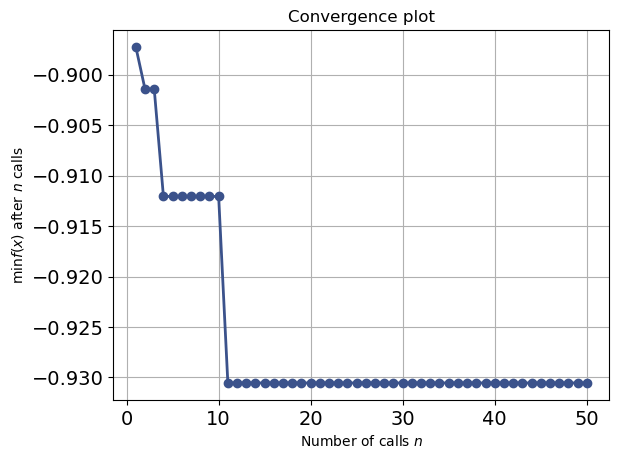

In [16]:
from skopt import gp_minimize
from skopt.space import Integer
from skopt.plots import plot_convergence

# Define the search space for hyperparameters
space = [
    Integer(5, 200, name='n_estimators'),
    Integer(2, 10, name='max_depth')
]

# Perform hyperparameter tuning using gp_minimize
result = gp_minimize(
    gb_score,  # function to minimize
    space,  # search space
    acq_func='EI',  # acquisition function
    n_calls=50,  # number of evaluations
    random_state=42  # random state for reproducibility
)

# Generate a convergence plot to show the speed of convergence
plot_convergence(result)

# Print out the best hyperparameters corresponding to the best point
best_params = {
    'n_estimators': result.x[0],
    'max_depth': result.x[1]
}
print("Best hyperparameters:", best_params)


### 3(f) 

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


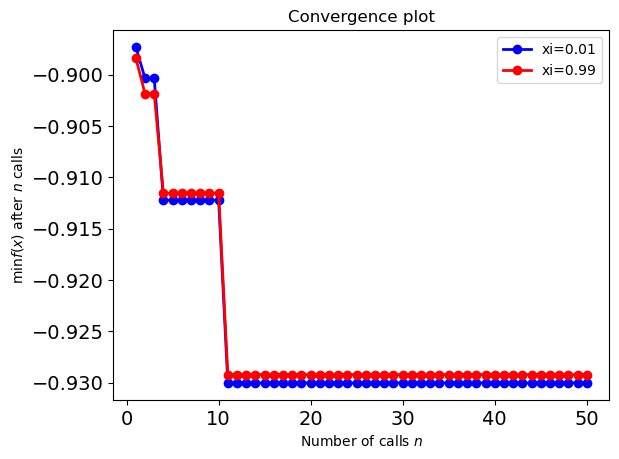

Best hyperparameters for xi=0.01: {'n_estimators': 200, 'max_depth': 4}
Best hyperparameters for xi=0.99: {'n_estimators': 200, 'max_depth': 4}


In [17]:
from skopt import gp_minimize
from skopt.space import Integer
from skopt.plots import plot_convergence
import matplotlib.pyplot as plt

# Define the search space for hyperparameters
space = [
    Integer(5, 200, name='n_estimators'),
    Integer(2, 10, name='max_depth')
]

# Perform hyperparameter tuning using gp_minimize with xi=0.01
result_xi_001 = gp_minimize(
    gb_score,  # function to minimize
    space,  # search space
    acq_func='EI',  # acquisition function
    xi=0.01,  # exploration-exploitation trade-off
    n_calls=50,  # number of evaluations
    random_state=42  # random state for reproducibility
)

# Perform hyperparameter tuning using gp_minimize with xi=0.99
result_xi_099 = gp_minimize(
    gb_score,  # function to minimize
    space,  # search space
    acq_func='EI',  # acquisition function
    xi=0.99,  # exploration-exploitation trade-off
    n_calls=50,  # number of evaluations
    random_state=42  # random state for reproducibility
)

# Generate a convergence plot for xi=0.01
plot_convergence(result_xi_001)

# Customize the first plot to set its color and label
plt.gca().get_lines()[0].set_color('blue')
plt.gca().get_lines()[0].set_label('xi=0.01')

# Generate a convergence plot for xi=0.99
plot_convergence(result_xi_099)

# Customize the second plot to set its color and label
plt.gca().get_lines()[1].set_color('red')
plt.gca().get_lines()[1].set_label('xi=0.99')

# Add legend and show the plot
plt.legend()
plt.show()

# Print out the best hyperparameters corresponding to the best points for both xi values
best_params_xi_001 = {
    'n_estimators': result_xi_001.x[0],
    'max_depth': result_xi_001.x[1]
}
best_params_xi_099 = {
    'n_estimators': result_xi_099.x[0],
    'max_depth': result_xi_099.x[1]
}
print("Best hyperparameters for xi=0.01:", best_params_xi_001)
print("Best hyperparameters for xi=0.99:", best_params_xi_099)


# The rate of convergence to the 'best' hyperparameters in extreme cases (xi=0.01 / 0.99) is faster for 0.99 xi value in the context of 50 calls. 
# This higher xi value places a `higher emphasis on exploration over exploitation`. Where it is more likely to explore new regions even if they seem suboptimal based on current knowledge. 
# Furthermore, it also can be seen that the hyperparameters for the 0.01 xi value is different from the 0.99 xi value. This could suggest that the 0.01 xi value algorithm is having a `premature convergence` because it focuses too much on exploitation of the current best solution rather than exploring other regions. Therefore, stuck in a `local minimum instead of a global minimum`. 

## Problem 4: Comparison of Particle Swarm and Bayesian Optimization

### 4(a) 

In [18]:
def rosenbrock_function(X):
    x = X[0]
    y = X[1]
    return (1 - x)**2 + 100 * (y - x**2)**2


In [19]:
print(rosenbrock_function([1,1]))

0


In [20]:
# Generating the 2D mesh grid

X0, X1 = np.mgrid[-10:10:0.1, -10:10:0.1]
print(X0.shape)
print(X1.shape)

(200, 200)
(200, 200)


In [21]:
# Calculating the function values

Z = []
for i in range(len(X0)):
    Z.append([])
    for j in range(len(X0[0])):
        Z[i].append(rosenbrock_function([X0[i][j],X1[i][j]]))

Z = np.array(Z)       
print(Z)
#Z contains the ground truth

[[1210121.   1207922.   1205725.   ...  815530.    813725.    811922.  ]
 [1166734.82 1164575.62 1162418.42 ...  779984.42  778219.22  776456.02]
 [1124564.8  1122445.   1120327.2  ...  745576.2   743850.4   742126.6 ]
 ...
 [1083548.5  1081467.7  1079388.9  ...  712242.9   710556.1   708871.3 ]
 [1124525.6  1122405.8  1120288.   ...  745537.    743811.2   742087.4 ]
 [1166695.22 1164536.02 1162378.82 ...  779944.82  778179.62  776416.42]]


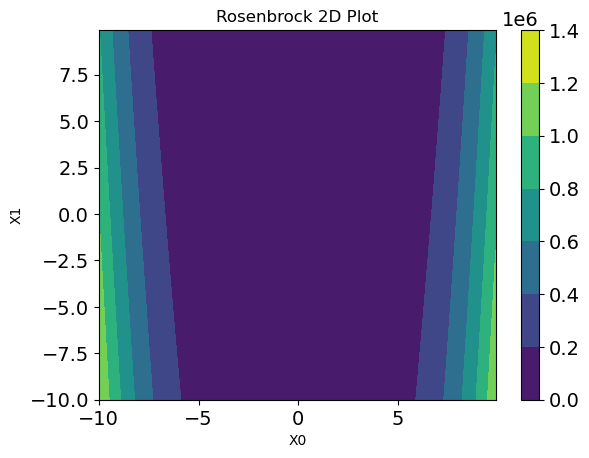

In [22]:
# 2D contour plot

plt.contourf(X0, X1, Z, cmap = 'viridis') 
plt.xlabel('X0')
plt.ylabel('X1')
plt.colorbar()
plt.title('Rosenbrock 2D Plot')
plt.show()

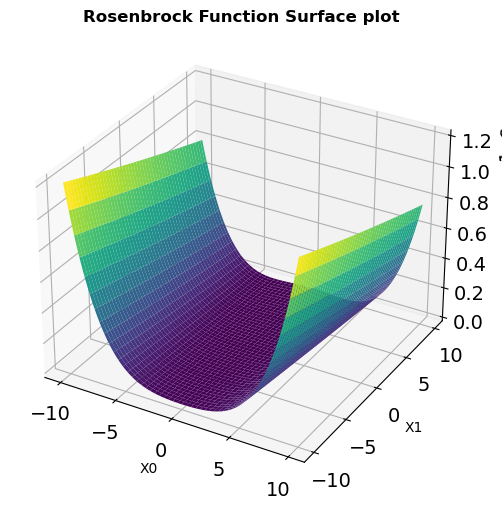

In [23]:
#3D Branin plot

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X0, X1, Z,cmap='viridis', edgecolor='none')
plt.xlabel('X0')
plt.ylabel('X1')
ax.set_title('Rosenbrock Function Surface plot',fontweight='bold')
plt.show()

In [24]:
samples = 10

X0 = np.random.rand(samples)*15
X1 = -5 + np.random.rand(samples)*20
Z = []
for i in range(samples):
    Z.append(rosenbrock_function([X0[i],X1[i]]))

In [25]:
df = pd.DataFrame({'X0':X0,'X1':X1,'Rosenbrock':Z})
df

,X0,X1,Rosenbrock
0,12.873087,12.523571,2.346944e+06
1,10.331904,7.262842,9.898216e+05
2,6.065413,0.076310,1.348096e+05
3,4.643041,4.361930,2.958316e+04
4,11.107017,11.967975,1.241050e+06
5,7.906756,-2.853801,4.273790e+05
6,8.374217,1.569425,4.700755e+05
7,8.023708,8.280664,3.147616e+05
8,6.169008,-1.189697,1.540544e+05
9,9.726687,-2.432117,9.417629e+05


In [26]:
df.describe()

,X0,X1,Rosenbrock
count,10.000000,10.000000,1.000000e+01
mean,8.522084,3.956710,7.050243e+05
std,2.529991,5.790846,7.063133e+05
min,4.643041,-2.853801,2.958316e+04
25%,6.603445,-0.873195,1.942312e+05
50%,8.198962,2.965677,4.487273e+05
75%,10.180600,8.026208,9.778069e+05
max,12.873087,12.523571,2.346944e+06


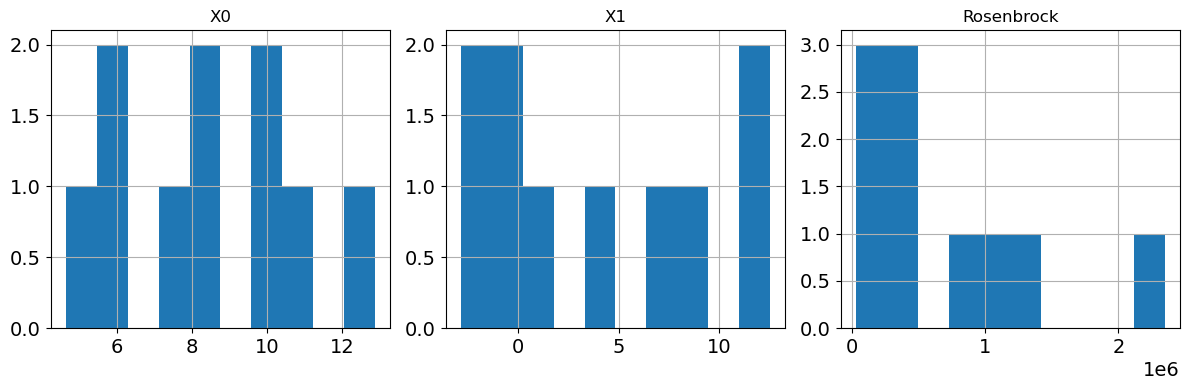

In [27]:
# Visualizing the data distribution

df.hist(figsize =(12,4),layout=(1,3))

plt.tight_layout()
plt.show()

In [28]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [29]:
from sklearn.preprocessing import StandardScaler

# Standard scaler transforms the data to have mean 0 and variance 1

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [30]:
Y = Y.values

In [31]:
from sklearn.model_selection import train_test_split

# Train test split with test set size of 50%

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)

In [32]:
from sklearn import metrics

# Plot prediction vs true values for training and test sets
def plot(regressor_name, y_train, y_hat_train, y_test, y_hat_test):

    plt.rc('xtick',labelsize=14)
    plt.rc('ytick',labelsize=14)
    
    plt.figure(figsize = (14,6))
    
    # first subplot - training set
    ax1 = plt.subplot(121)
    
    # plot predicted values vs actual values
    plt.scatter(y_train,y_hat_train)
    
    # add a dash line indicating perfect predictions (Y=X)
    plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',lw=3)
    
    plt.xlabel('True Value',fontsize=16)
    plt.ylabel('Predicted Value',fontsize=16)
    
    # calculate mean squared error
    mse = metrics.mean_squared_error(y_train,y_hat_train)
    rmse = mse**0.5
    
    # calculate R2
    R2 = metrics.r2_score(y_train, y_hat_train)
    
    plt.title(regressor_name+' training set'+'\nRMSE: '+str(rmse)+'\nR2: '+str(R2),fontsize=16)


    # second subplot - test set
    ax2 = plt.subplot(122)
    
    # plot predicted values vs actual values
    plt.scatter(y_test,y_hat_test)
    
    # add a dash line indicating perfect predictions (Y=X)
    plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=3)
    
    plt.xlabel('True Value',fontsize=16)
    plt.ylabel('Predicted Value',fontsize=16)
    
    # calculate mean squared error
    mse = metrics.mean_squared_error(y_test,y_hat_test)  
    rmse = mse**0.5
    
    # calculate R2
    R2 = metrics.r2_score(y_test,y_hat_test)
    
    plt.title(regressor_name+' test set'+'\nRMSE: '+str(rmse)+'\nR2: '+str(R2),fontsize=16)

    
    plt.show()

    # return rmse and R2 - we can track the errors across different algorithms
    return rmse, R2



The optimized parameters are:
 {'k1': 1**2, 'k2': RBF(length_scale=1), 'k1__constant_value': 1.0, 'k1__constant_value_bounds': 'fixed', 'k2__length_scale': 1.0, 'k2__length_scale_bounds': 'fixed'}


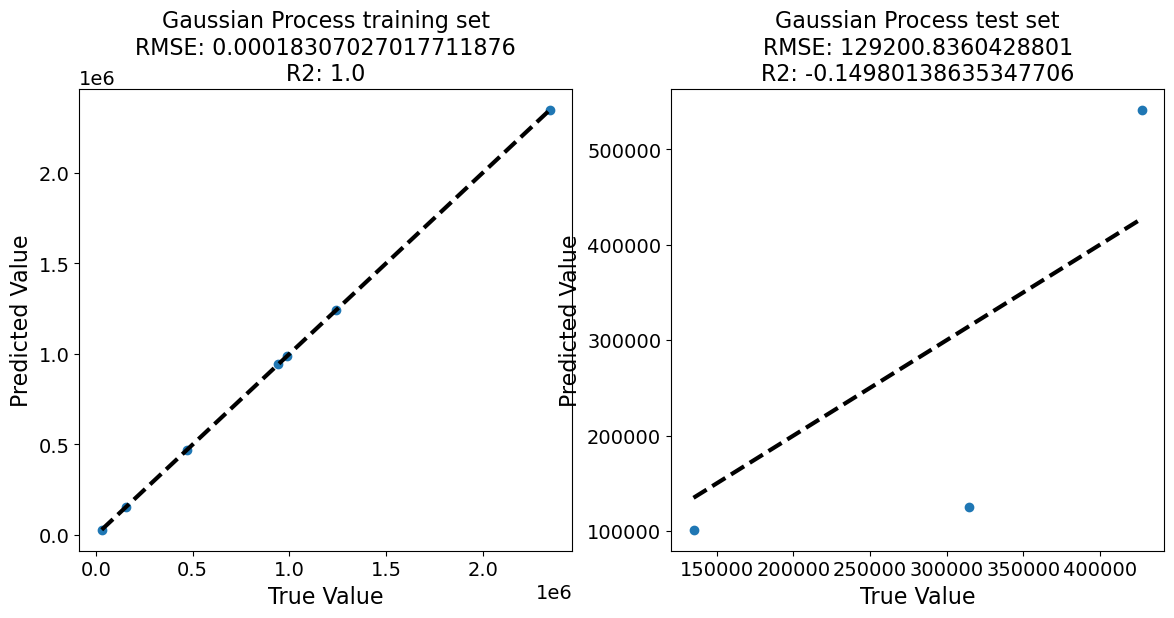

In [33]:
from skopt.learning import GaussianProcessRegressor
gpr = GaussianProcessRegressor()

# train the regressor on the training set
gpr.fit(X_train,y_train)

# print the optimized parameters
params = gpr.kernel_.get_params()
print('The optimized parameters are:\n',params)

# use the trained regressor to predict on the training and test sets
y_hat_train=gpr.predict(X_train)
y_hat_test=gpr.predict(X_test)

rmse_, R2_ = plot('Gaussian Process', y_train, y_hat_train, y_test, y_hat_test)

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


The optimized parameters are:
 {'k1': 316**2, 'k2': Matern(length_scale=0.938, nu=1.5), 'k1__constant_value': 100000.00000000001, 'k1__constant_value_bounds': (1e-05, 100000.0), 'k2__length_scale': 0.9375136583319084, 'k2__length_scale_bounds': (0.1, 10.0), 'k2__nu': 1.5}


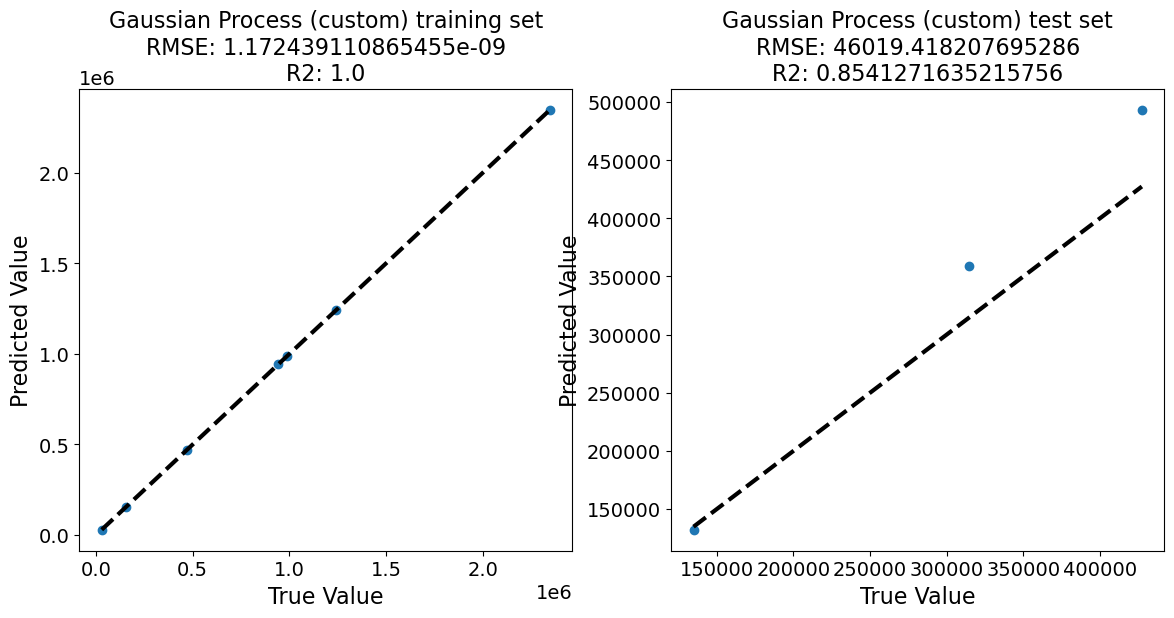

In [34]:
from skopt.learning.gaussian_process.kernels import RBF, ConstantKernel, Matern

# Using custom tunable kernel for GPR
matern_tunable = ConstantKernel(1.0) * Matern(
    length_scale=1.0, length_scale_bounds=(1e-1, 1e1), nu=1.5)

# Implementing the GPR with the custom kernel
gpr = GaussianProcessRegressor(kernel=matern_tunable, alpha=1e-10)

# train the regressor on the training set
gpr.fit(X_train,y_train)

# print the optimized parameters
params = gpr.kernel_.get_params()
print('The optimized parameters are:\n',params)

# use the trained regressor to predict on the training and test sets
y_hat_train=gpr.predict(X_train)
y_hat_test=gpr.predict(X_test)

rmse_, R2_ = plot('Gaussian Process (custom)', y_train, y_hat_train, y_test, y_hat_test)

### 4(b), (c), (d)

In [35]:
# Using the same kernel parameters as above
matern_tunable = ConstantKernel(1.0) * Matern(
    length_scale=1.0, length_scale_bounds=(1e-1, 1e1), nu=1.5)

# Implementing the GPR with the custom kernel
gpregressor = GaussianProcessRegressor(kernel=matern_tunable, alpha=1e-10)

In [36]:
# Import the Optimizer class
from skopt import Optimizer

# Defining the optimization bounds, ie the bounds of the Branin Function
bounds = [(0.0,15.0),(-5.0,15.0)]

# Defining the Optimizer
# We set no initial points or random starts
# The GPR defined above is the estimator
# Expected Improvement will be the acquisition function
opt = Optimizer(dimensions = bounds,
                n_initial_points = 0,
                base_estimator = gpregressor,
                acq_func = 'EI',
                n_random_starts=0,
                )

In [37]:
# The previously generated 50 parameter points
initial_x = np.array(df.iloc[:,:-1]).tolist()

# The previously generated 50 Branin values
initial_y = np.array(df.iloc[:,-1]).tolist()

# Tells the optimizer what the observed values are
opt.tell(initial_x, initial_y)

          fun: 29583.15597656004
    func_vals: array([2346944.4598038 ,  989821.59906443,  134809.58479243,
         29583.15597656, 1241050.25846901,  427379.04665499,
        470075.48927949,  314761.61601332,  154054.37639572,
        941762.93555653])
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=1.5))]
 random_state: RandomState(MT19937) at 0x1C2FF3FF040
        space: Space([Real(low=0.0, high=15.0, prior='uniform', transform='normalize'),
       Real(low=-5.0, high=15.0, prior='uniform', transform='normalize')])
        specs: {'args': {'dimensions': [(0.0, 15.0), (-5.0, 15.0)], 'base_estimator': GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=1.5)), 'n_random_starts': 0, 'n_initial_points': 0, 'initial_point_generator': 'random', 'n_jobs': 1, 'acq_func': 'EI', 'acq_optimizer': 'auto', 'random_state': None, 'model_queue_size': None, 'space_constraint': None, 'acq_func_kwargs': None, 'acq_optimizer_kwargs': None, 'avoid_duplica

In [38]:
# The optimizer suggests the next experimental points
# Number of points can be specified
x_next = opt.ask(n_points = 1)
print(x_next)

[[1.5337790148174961, 4.319763422514866]]


In [39]:
gpr.predict(x_next)


array([79221.95559094])

In [40]:
print(rosenbrock_function(x_next[0]))

387.30608731655724


In [41]:
# Import the gp_minimize library
from skopt import gp_minimize

# Using a Matern kernel with large bounds
# Here, n_dims are used to specify the dataset dimension, which is 2 in this case

n_dims = 2

matern_tunable = ConstantKernel(1.0, constant_value_bounds=(1e-5,1e5)) * Matern(
    length_scale=np.ones(n_dims), length_scale_bounds=[(1e-5, 1e5)] * n_dims, nu=2.5)

# Implementing the GPR with above kernel
gpregressor = GaussianProcessRegressor(kernel=matern_tunable, alpha=1e-10, 
                                       n_restarts_optimizer=10)

# Storing the optimization results in a variable, res_gp
# Setting the Rosenbrock Function as the function to be minimized
# Optimization bounds are the original bounds, as before
res_gp = gp_minimize(func = rosenbrock_function, 
                     dimensions = bounds,
                     n_calls = 200, 
                     base_estimator=gpregressor, 
                     acq_func='EI', 
                     n_random_starts=1, 
                     xi=0.1)

print('Optimized value is '+str(res_gp.fun)+' at '+str(res_gp.x))

Optimized value is 0.0017443363804317742 at [0.9623103071683868, 0.924241617808546]


In [42]:
print(res_gp)

          fun: 0.0017443363804317742
    func_vals: array([4.11386150e+02, 4.41019600e+06, 4.59344650e+02, 2.25010000e+04,
       3.60311396e+05, 2.93874716e+04, 4.19223199e+03, 6.24870796e+03,
       1.52415228e+02, 2.21851338e+02, 6.02085959e+05, 1.14033648e+00,
       4.45623924e+03, 5.34573867e+00, 1.19955560e+04, 2.56140864e+02,
       8.55516139e+05, 1.00232804e+05, 1.79944411e+05, 2.47793980e+06,
       2.12293163e+02, 1.02692264e+03, 4.11678224e+01, 2.11844905e+01,
       3.50268884e+02, 4.77096590e+03, 2.80171419e+00, 3.03084115e+02,
       8.82253507e-01, 1.37335673e-01, 8.86682879e-01, 6.46782942e+00,
       7.35402984e-02, 9.43804546e-02, 6.61111044e+03, 7.79174194e+04,
       2.24895420e-02, 1.58482350e-02, 9.62995015e-02, 4.84519463e-02,
       6.57533332e-01, 3.52215462e-01, 1.24374086e-02, 5.31720384e-02,
       4.58402463e-02, 1.96046849e-01, 1.00825774e-01, 1.97453055e-01,
       8.40959474e-02, 3.85397538e+00, 7.00857379e-02, 9.48496007e-02,
       1.74433638e-03, 3.

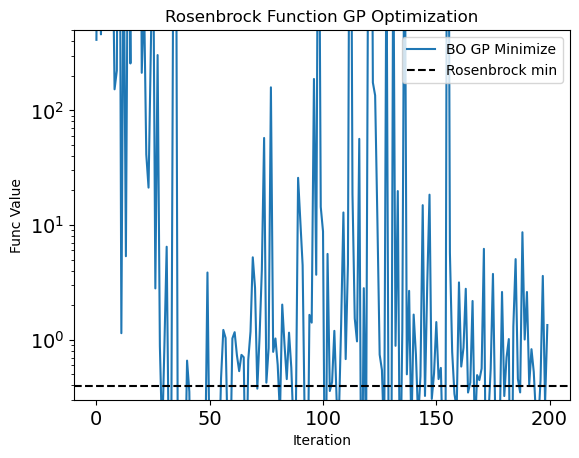

In [43]:
plt.plot(res_gp.func_vals,label='BO GP Minimize')
plt.yscale('log')
plt.axhline(y=0.397887,color='black',linestyle='--',label='Rosenbrock min')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Func Value')
plt.ylim(0.3,500)
plt.title('Rosenbrock Function GP Optimization')
plt.show()

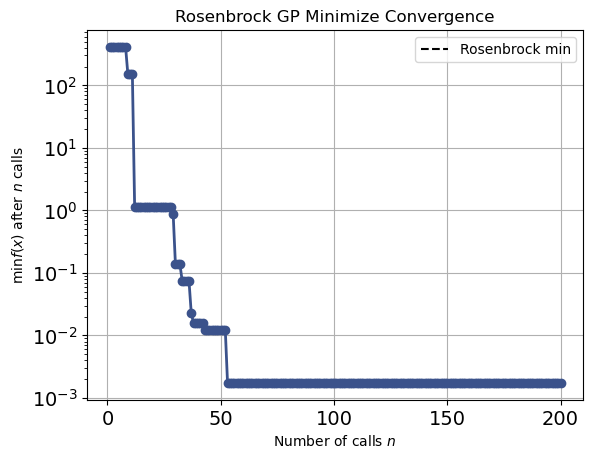

In [44]:
from skopt.plots import plot_convergence

plot_convergence(res_gp)
plt.title('Rosenbrock GP Minimize Convergence')
plt.yscale('log')
plt.axhline(y=0,color='black',linestyle='--',label='Rosenbrock min')
plt.legend()
#plt.grid(visible=True)
plt.show()

In [45]:
## Import basic math and PSO packages
import numpy as np
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

In [46]:
## Set-up the associated hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}  

In [47]:
## Declare the PSO global optimizer
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)  

In [48]:
## Call the PSO optimizer to solve a benchmark function
best_cost, best_pos = optimizer.optimize(fx.sphere, iters=100)

2024-04-09 02:59:08,011 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=2.56e-8
2024-04-09 02:59:08,085 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.5556196857277692e-08, best pos: [1.59862453e-04 4.39262800e-07]


In [49]:
## Import packages for visualization
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
import matplotlib.pyplot as plt

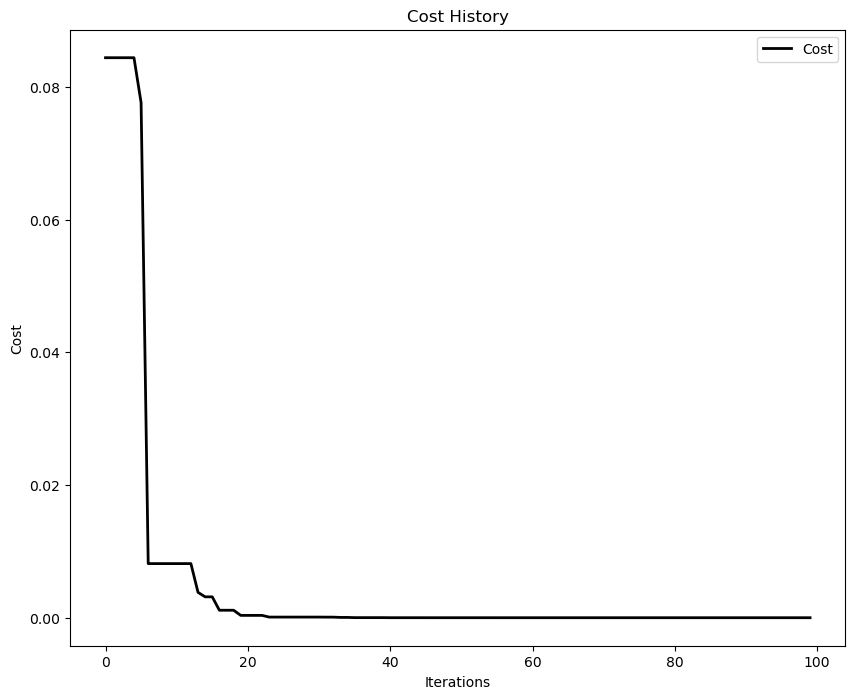

In [50]:
## Plot the evolution history 
plot_cost_history(optimizer.cost_history)
plt.show()

In [51]:
## Declare mesh for 3D plot
from pyswarms.utils.plotters.formatters import Mesher, Designer
# Plot the sphere function's mesh for better plots
m = Mesher(func=fx.sphere,
           limits=[(-1,1), (-1,1)])
# Adjust figure limits
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)],
             label=['x-axis', 'y-axis', 'z-axis'])

In [52]:
## Separate out the plot for clarity
%matplotlib qt

In [53]:
## Visualize particle movements on the 3D plot 
pos_history_3d = m.compute_history_3d(optimizer.pos_history) # preprocessing
animation3d = plot_surface(pos_history=pos_history_3d,
                           mesher=m, designer=d,
                           mark=(0,0,0))

In [54]:
## Switch back to the inline plotting
%matplotlib inline

In [55]:
!conda install --yes --prefix {sys.prefix} ffmpeg


EnvironmentLocationNotFound: Not a conda environment: C:\Users\alexa\MS4671\week 3\{sys.prefix}



In [56]:
import matplotlib.pyplot as plt
plt.rcParams['animation.writer'] = 'ffmpeg'


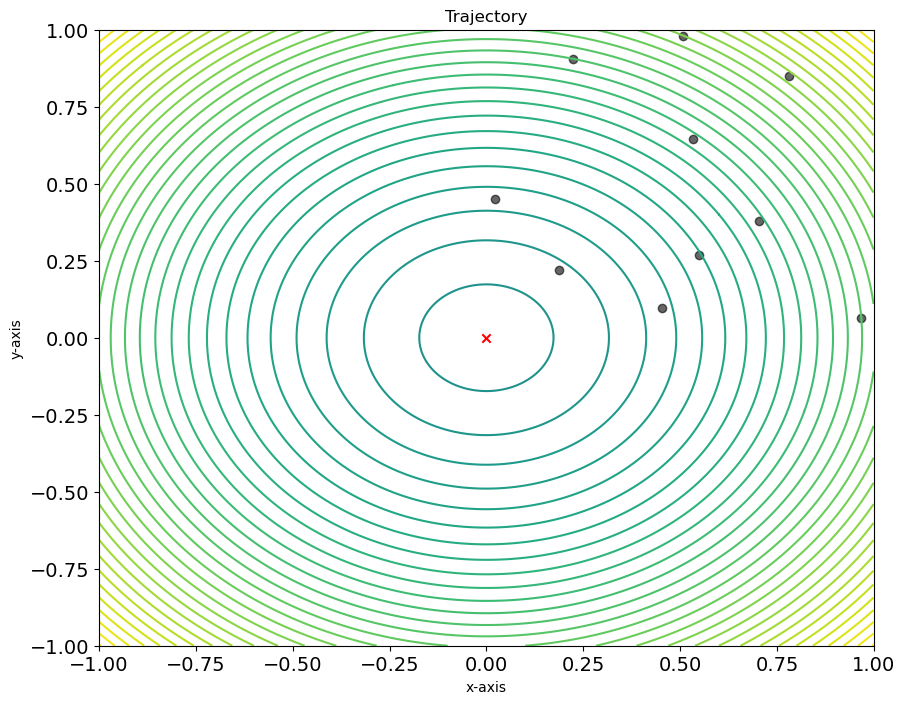

In [57]:
# Make animation
from IPython.display import HTML

animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))


In [58]:
# Define the Rosenbrock function
def rosenbrock_function(x):
    return np.sum(100.0 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

# Initialize options for the optimizer
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call the PSO optimizer to solve the Rosenbrock function
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=2, options=options)
optimizer.optimize(rosenbrock_function, iters=200)

2024-04-09 02:59:13,205 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████████|200/200, best_cost=65.1
2024-04-09 02:59:13,374 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 65.14435275478402, best pos: [-0.12628316  0.94428855]


(65.14435275478402, array([-0.12628316,  0.94428855]))

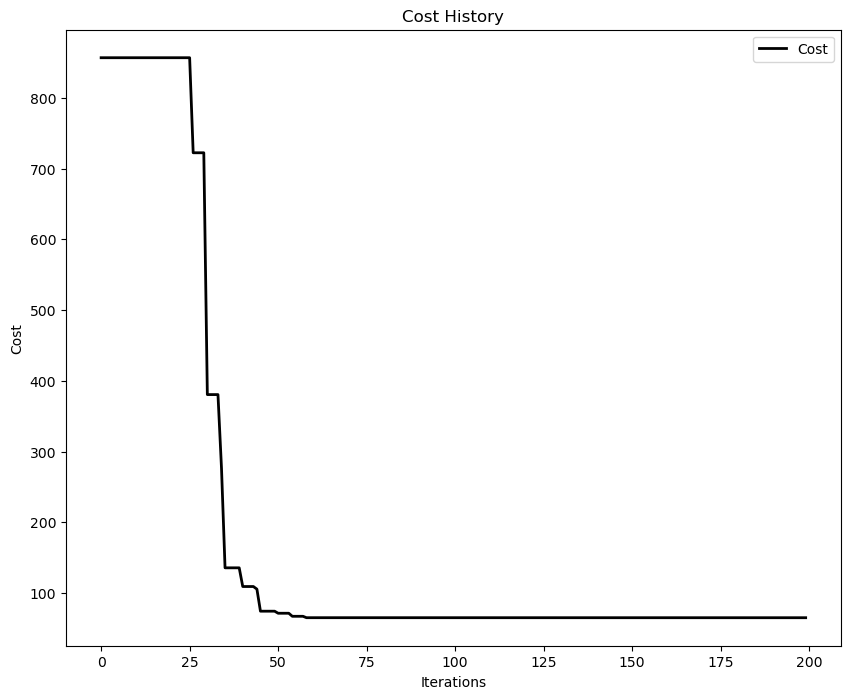

In [59]:
## Plot the evolution history
plot_cost_history(optimizer.cost_history)
plt.show()

### 4(e)

# The `BO algorithm` achieved an `better optimised value` of close to 0 ( 0.00174) as compared to the `PSO algorithm` (65.1) as it could not manage to converge to the `actual global minimum of 0` at [1,1]
# The PSO algorithm evolution history graph suggests that there may be premature convergence even with the same options and iterations. 
# BO approximately achieved convergence at around 50 iterations while PSO achieved premature convergence relatively early at around 15 iterations.
# However, changing the options for better emphasis on exploration vs. exploitation with changes in the # of particles and iterations. A `significantly better optimised value` (0.312) can be achieved with this change. This can be seen below.
# Thereby, suggesting that PSO could possibly require more fine-tuning of its hyperparameters to achieve more accurate optimisations. Hence a more sensitive algorithm for optimisation.

In [69]:
# Define the Rosenbrock function
def rosenbrock_function(x):
    return np.sum(100.0 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

# Initialize options for the optimizer
options = {'c1': 1.5, 'c2': 1.5, 'w':0.7}

# Call the PSO optimizer to solve the Rosenbrock function
optimizer = ps.single.GlobalBestPSO(n_particles=2, dimensions=2, options=options)
optimizer.optimize(rosenbrock_function, iters=1000)

2024-04-09 03:00:41,070 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.7}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|1000/1000, best_cost=0.313
2024-04-09 03:00:41,910 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.3128025635269489, best pos: [0.48603642 0.78427505]


(0.3128025635269489, array([0.48603642, 0.78427505]))

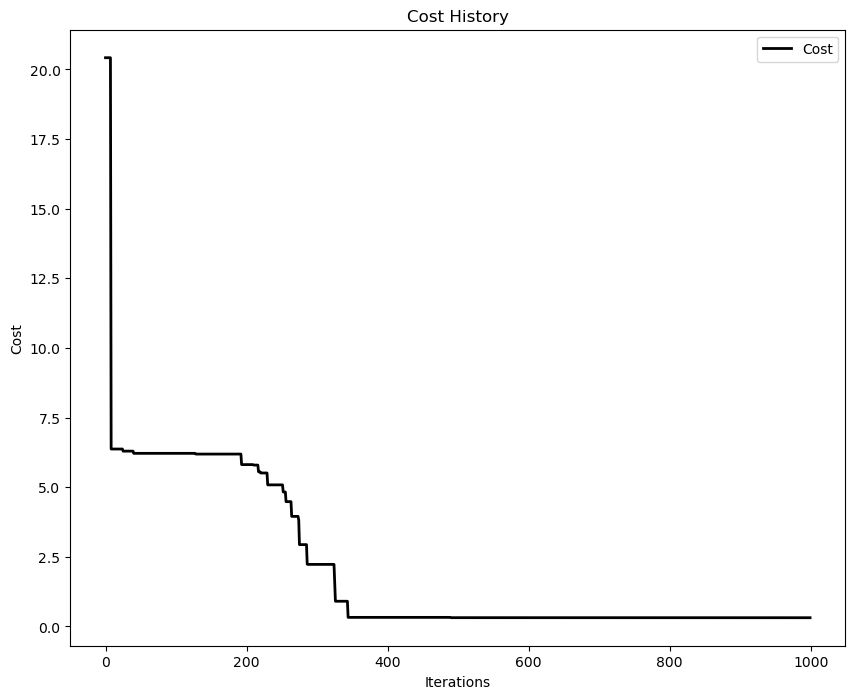

In [70]:
## Plot the evolution history
plot_cost_history(optimizer.cost_history)
plt.show()